In [24]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#from config import consumer_key, consumer_secret, access_token, access_token_secret

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

consumer_key = "rR9EYifG337ntSf6jIZudcMML"
consumer_secret = "C7CpZDCj8kLj6EWtiW6vyrhi41OAcVpIQXTpsh6eryoFxtk62J"
access_token = "930145429223813121-N5RznIrke8TcHiW9kotbrNy7bOMb4ye"
access_token_secret = "MuldQw0WWHeLdCBvspaCcRM3u9zvk4w8NOPYdxIZPBqDH"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [25]:
# Target User Account
target_user = ("@BBC","@CBS","@CNN","@Fox","@NYTimes")

# "Real Person" Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

# Array to hold sentiment
sentiments_array = []
sentiment_avg_array = []

In [31]:
# Loop through all target users
for target in target_user:
    
    counter = 1

    # Variable for holding the oldest tweet
    oldest_tweet = None

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through 10 times
    for x in range(1):

        # Run search around each tweet
        public_tweets = api.search(
            target, count=100, result_type="recent", max_id=oldest_tweet)

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:

            # Use filters to check if user meets conditions
            if (tweet["user"]["followers_count"] < max_followers
                and tweet["user"]["statuses_count"] > min_tweets
                and tweet["user"]["statuses_count"] < max_tweets
                and tweet["user"]["friends_count"] < max_following
                and tweet["user"]["lang"] == lang):

                # Run Vader Analysis on each tweet
                results = analyzer.polarity_scores(tweet["text"])
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]

                # Add each value to the appropriate array
                compound_list.append(compound)
                positive_list.append(pos)
                negative_list.append(neg)
                neutral_list.append(neu)
                
                # Set the new oldest_tweet value
                oldest_tweet = int(tweet["id_str"]) - 1
                
                # Add sentiments for each tweet into an array
                sentiments_array.append({"Date": tweet["created_at"],
                           "User": target,           
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
                sentiments_pd = pd.DataFrame.from_dict(sentiments_array)
            
                # Add to counter 
                counter = counter + 1
        
   

                
    # Store the Average Sentiments
    sentiment_avg_array.append({"User": target,
        "Compound": np.mean(compound_list),
        "Positive": np.mean(positive_list),
        "Negative": np.mean(negative_list),
        "Neutral": np.mean(neutral_list),
        "Tweet Count": len(compound_list)})
    sentiment_avg_pd = pd.DataFrame.from_dict(sentiment_avg_array)


,Compound,Date,Negative,Neutral,Positive,Tweets Ago,User
0,-0.3818,Sat Dec 02 01:21:32 +0000 2017,0.880,0.120,0.000,1,@BBC
1,0.0000,Sat Dec 02 01:20:31 +0000 2017,1.000,0.000,0.000,2,@BBC
2,-0.5267,Sat Dec 02 01:20:23 +0000 2017,0.841,0.159,0.000,3,@BBC
3,0.3605,Sat Dec 02 01:20:16 +0000 2017,0.898,0.000,0.102,4,@BBC
4,0.0000,Sat Dec 02 01:19:14 +0000 2017,1.000,0.000,0.000,5,@BBC


In [27]:
sentiments_pd = sentiments_pd.set_index('User')
BBC = sentiments_pd.loc['@BBC']
CBS = sentiments_pd.loc['@CBS']
CNN = sentiments_pd.loc['@CNN']
FOX = sentiments_pd.loc['@Fox']
NYTimes = sentiments_pd.loc['@NYTimes']

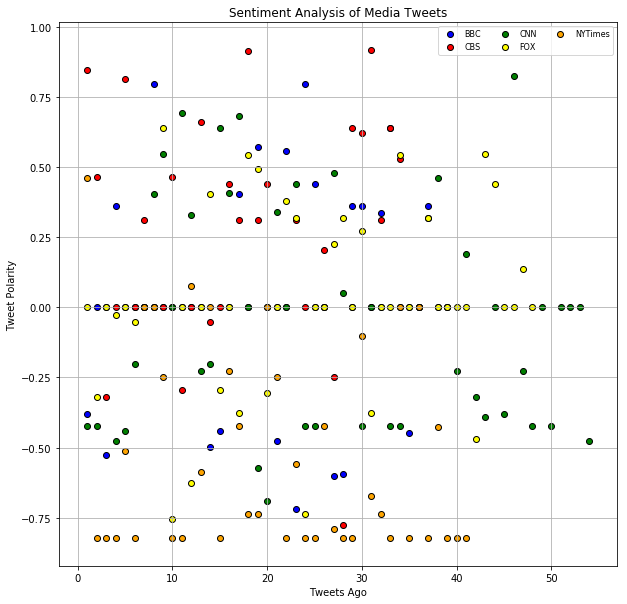

In [28]:
# Plot the sentiments
plt.figure(figsize = (10,10))
BBC = plt.scatter(BBC['Tweets Ago'], BBC['Compound'], color='blue', edgecolors='black')
CBS = plt.scatter(CBS['Tweets Ago'], CBS['Compound'], color='red', edgecolors='black')
CNN = plt.scatter(CNN['Tweets Ago'], CNN['Compound'], color='green', edgecolors='black')
FOX = plt.scatter(FOX['Tweets Ago'], FOX['Compound'], color='yellow', edgecolors='black')
NYTimes = plt.scatter(NYTimes['Tweets Ago'], NYTimes['Compound'], color='orange', edgecolors='black')
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.title('Sentiment Analysis of Media Tweets')
plt.legend((BBC,CBS,CNN,FOX,NYTimes),('BBC', 'CBS', 'CNN', 'FOX', 'NYTimes'),numpoints=1, loc='best', ncol=3, fontsize=8)
plt.grid()
plt.show()

In [29]:
sentiment_user_pd = sentiment_avg_pd.set_index('User')
sentiment_user_pd

,Compound,Negative,Neutral,Positive,Tweet Count
User,,,,,
@BBC,0.033164,0.050359,0.879846,0.069769,39
@CBS,0.248418,0.045265,0.801294,0.153471,34
@CNN,-0.033906,0.100815,0.819056,0.080111,54
@Fox,0.025877,0.052271,0.879521,0.068208,48
@NYTimes,-0.529041,0.240976,0.741146,0.017902,41


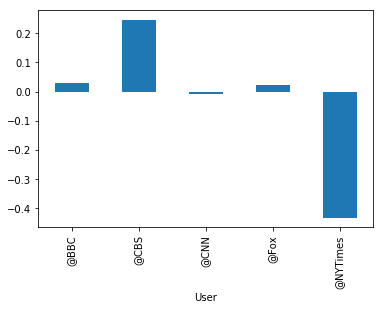

In [33]:
sentiment_avg_pd.groupby(["User"])["Compound"].mean().plot(kind="bar")
plt.show()

In [ ]:
# To do:
# - Clean Code
# - Clean Graphs
# - Have Program Run For 200 tweets
